# Dataset statistics and feature ranking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

user_logs = pd.read_csv('Dataset/user_log.csv')
user_profile = pd.read_csv('Dataset/user_info.csv')
train_df = pd.read_csv('Dataset/train.csv')
test_df = pd.read_csv('Dataset/test.csv')

In [2]:
user_logs.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,219316,472,737,801,5890.0,1018,0
1,69247,471,1266,4614,4331.0,619,2
2,69247,471,1266,4614,4331.0,619,0
3,216952,352,991,3527,869.0,626,0
4,216952,352,991,3527,869.0,626,0


In [17]:
#user_logs contains all the data from item id: 321 -480
print("maximum item id :" + str(user_logs['item_id'].max()))
print("minimum item id :" + str(user_logs['item_id'].min()))

maximum item id :480
minimum item id :321


In [3]:
#size of user logs dataset
user_logs.shape

(7402, 7)

In [22]:
#Duplicate records found in userlog dataset
user_logs.duplicated().sum()

2033

In [131]:
# There are no duplicate records for action type ==3
user_logs2=user_logs[user_logs['action_type']==3]
user_logs2.duplicated().sum()

0

In [132]:
#Grouping by seller_id
user_logs.groupby('seller_id').size().to_frame().reset_index()

,seller_id,0
0,20,3
1,28,15
2,59,1
3,99,1
4,121,12
...,...,...
141,4769,4
142,4790,14
143,4801,65
144,4834,60


In [96]:
#Seller_id which is popular i.e widely reacheable to the  people
seller_bygroup=user_logs.groupby('seller_id').size()
print("Most popular seller Id : "+ str(seller_bygroup.idxmax()))
print("count: "+str(seller_bygroup.max()))

Most popular seller Id : 801
count: 2468


In [95]:
#Seller_id which is least popular
print("Least popular seller Id : "+ str(seller_bygroup.idxmin()))
print("count : "+str(seller_bygroup.min()))

Least popular seller Id : 59
count : 1


In [134]:
# seller id whose products is brought maximum by the users
purchased_df=user_logs[user_logs['action_type']==2]
purchased_seller_bygroup=purchased_df.groupby('seller_id').size()
print("Seller Id who has most bought products: "+ str(purchased_seller_bygroup.idxmax()))
print("count: "+str(purchased_seller_bygroup.max()))


Seller Id who has most bought products: 801
count: 290


In [133]:
#Grouping dataset by action type - (0 :click, 1 :add-to-cart, 2 :purchase, 3 :add-to-favourite)
user_logs.groupby('action_type').size().to_frame().reset_index()

,action_type,0
0,0,6385
1,1,9
2,2,579
3,3,429


In [73]:
#Only 9 items were added to the cart by the users
action_type_1=user_logs[user_logs['action_type']==1]
action_type_1

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
201,313304,368,1611,1816,NaN,1110,1
552,310350,350,905,2193,NaN,1024,1
962,116100,472,737,801,NaN,923,1
1369,356593,323,1397,3677,NaN,1012,1
2860,222010,371,664,962,NaN,1111,1
3144,71401,368,1611,1816,NaN,1101,1
3150,329040,467,151,1056,NaN,1109,1
6288,417084,365,1213,1364,NaN,915,1
6339,143500,472,737,801,NaN,923,1


In [135]:
#grouping by cat_id
user_logs.groupby('cat_id').size().to_frame().reset_index()

,cat_id,0
0,2,68
1,35,1
2,36,67
3,40,111
4,70,1
...,...,...
82,1604,161
83,1611,565
84,1643,1
85,1650,2


In [128]:
#Products of category id - 737 is widely reachable among people 
category_bygroup=user_logs.groupby('cat_id').size()
print("Most popular Category Id : "+ str(category_bygroup.idxmax()))
print("count: "+str(category_bygroup.max()))

Most popular Category Id : 737
count: 2477


In [146]:
#Products of category id - 35 is is less reachable among people 
print("Less popular Category Id : "+ str(category_bygroup.idxmin()))
print("count: "+str(category_bygroup.min()))

Less popular Category Id : 35
count: 1


In [127]:
#Products of category id - 737 is widely bought by people
purchased_category_bygroup=purchased_df.groupby('cat_id').size()
print("Most bought Category Id : "+ str(purchased_category_bygroup.idxmax()))
print("count: "+str(purchased_category_bygroup.max()))

Most bought Category Id : 737
count: 290


In [136]:
#grouping by brand_id
user_logs.groupby('brand_id').size().to_frame().reset_index()

,brand_id,0
0,82.0,1
1,99.0,161
2,202.0,9
3,277.0,47
4,404.0,2
...,...,...
144,8216.0,7
145,8282.0,2
146,8296.0,13
147,8353.0,516


In [126]:
# Brand Id - 5890 is popular among user
brand_bygroup=user_logs.groupby('brand_id').size()
print("Most Popular Brand Id : "+ str(brand_bygroup.idxmax()))
print("count: "+str(brand_bygroup.max()))

Most Popular Brand Id : 5890.0
count: 2466


In [130]:
# Brand Id - 82 is not popular among user
brand_bygroup=user_logs.groupby('brand_id').size()
print("Less popular Brand Id : "+ str(brand_bygroup.idxmin()))
print("count: "+str(brand_bygroup.min()))

Less popular Brand Id : 82.0
count: 1


In [124]:
# Brand Id - 5890 is most brought brand by user
purchased_brand_bygroup=purchased_df.groupby('brand_id').size()
print("Most bought Brand Id : "+ str(purchased_brand_bygroup.idxmax()))
print("count: "+str(purchased_brand_bygroup.max()))

Most bought Brand Id : 5890.0
count: 290


# Training data

In [137]:
#Merging user log and user profile
merge_user_log_user_profile=pd.merge(user_logs,user_profile,on='user_id')

In [138]:
merge_user_log_user_profile.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,219316,472,737,801,5890.0,1018,0,4.0,0.0
1,69247,471,1266,4614,4331.0,619,2,4.0,1.0
2,69247,471,1266,4614,4331.0,619,0,4.0,1.0
3,216952,352,991,3527,869.0,626,0,5.0,2.0
4,216952,352,991,3527,869.0,626,0,5.0,2.0


In [139]:
merge_user_log_user_profile.shape

(7402, 9)

In [141]:
#Renameing seller_id column to mechant_id
merge_user_log_user_profile = merge_user_log_user_profile.rename(columns={'seller_id': 'merchant_id'})

In [142]:
#Merging merge_user_log_user_profile and training data to create a final training data
final_merged_training_df=pd.merge(merge_user_log_user_profile,train_df,on=['user_id','merchant_id'],)

In [143]:
final_merged_training_df.head(5)

,user_id,item_id,cat_id,merchant_id,brand_id,time_stamp,action_type,age_range,gender,label
0,190023,424,662,3432,5093.0,1111,0,4.0,0.0,0
1,190023,424,662,3432,5093.0,1111,0,4.0,0.0,0
2,190023,424,662,3432,5093.0,1111,0,4.0,0.0,0
3,190023,424,662,3432,5093.0,1111,3,4.0,0.0,0
4,190023,424,662,3432,5093.0,1111,2,4.0,0.0,0


In [145]:
final_merged_training_df.shape

(390, 10)

In [154]:
category_final_bygroup=final_merged_training_df.groupby('cat_id').size()
category_final_bygroup.to_frame().reset_index()

,cat_id,0
0,40,4
1,151,71
2,184,3
3,302,2
4,384,3
5,407,1
6,420,18
7,469,13
8,656,1
9,662,122


In [155]:
brand_final_bygroup=final_merged_training_df.groupby('brand_id').size()
brand_final_bygroup.to_frame().reset_index()

,brand_id,0
0,277.0,4
1,1214.0,4
2,1292.0,3
3,1439.0,71
4,1766.0,2
5,2044.0,93
6,2095.0,5
7,2153.0,13
8,2276.0,1
9,2337.0,3


In [156]:
timestamp_final_bygroup=final_merged_training_df.groupby('time_stamp').size()
timestamp_final_bygroup.to_frame().reset_index()

,time_stamp,0
0,611,1
1,621,1
2,718,1
3,807,1
4,824,1
5,827,1
6,828,1
7,912,3
8,917,1
9,927,1


In [157]:
agerange_final_bygroup=final_merged_training_df.groupby('age_range').size()
agerange_final_bygroup.to_frame().reset_index()

,age_range,0
0,0.0,100
1,2.0,25
2,3.0,99
3,4.0,70
4,5.0,20
5,6.0,61
6,7.0,12
7,8.0,3


In [158]:
gender_final_bygroup=final_merged_training_df.groupby('gender').size()
gender_final_bygroup.to_frame().reset_index()

,gender,0
0,0.0,252
1,1.0,129
2,2.0,7


# Feature Selection 

<b>What is Feature Selectionin Machine Learning?</b>

The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

<b>What are the three steps in feature selection?<b>
    
- Data Preprocessing: Clean and prepare the data for feature selection.
    
- Feature Scoring: Compute scores for each feature to reflect its importance to the target variable.
    
- Selection: Select a subset of the most important features based on their scores, and use them for training the predictive model.
    
<b>What are the different types of feature selection techniques?</b>
- Filter Methods: Select features based on statistical measures such as correlation or chi-squared test.For example- Correlation-based Feature Selection, chi2 test, SelectKBest, and ANOVA F-value.
- Wrapper Methods: Select features by evaluating their combinations using a predictive model.For example- Recursive Feature Elimination, Backward Feature Elimination, Forward Feature Selection
- Embedded Methods: Select features by learning their importance during model training.For example- Lasso Regression, Ridge Regression, and Random Forest.
- Hybrid Methods: Combine the strengths of filter and wrapper methods. For Example- SelectFromModel
- Dimensionality Reduction Techniques: Reduce the dimensionality of the dataset and select the most important features. For Example- pca, lda, and ica.

In [184]:
#droping record with NaN value
final_merged_training_df=final_merged_training_df.dropna()

In [185]:
from sklearn.feature_selection import mutual_info_classif
X=final_merged_training_df.iloc[:,:-1]
Y=final_merged_training_df.iloc[:,-1:]

<b>Information Gain</b>

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.    

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


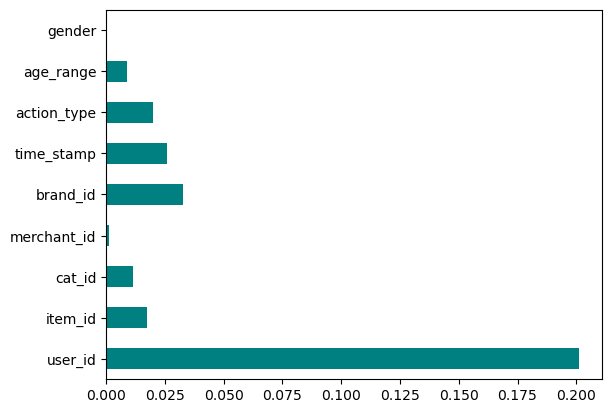

In [186]:
importances=mutual_info_classif(X,Y)
feature_importances=pd.Series(importances,final_merged_training_df.columns[0:len(final_merged_training_df.columns)-1])
feature_importances.plot(kind='barh',color='teal')
plt.show()

<b>Fischer Score</b>

Fisher score is one of the most widely used supervised feature selection methods. The algorithm we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [222]:
#!pip install skfeature-chappers

In [217]:
from skfeature.function.similarity_based import fisher_score
x_train=X.to_numpy()
y_train=Y.to_numpy()
#ranks1 = fisher_score.fisher_score(x_train, y_train,mode='rank')
# feat_importances=pd.Series(ranks,final_merged_training_df.columns[0:len(final_merged_training_df.columns)-1])
# feat_importances.plot(kind='barh',color='teal')
# plt.show()

<b> Correlation Coefficient</b>

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

<AxesSubplot:>

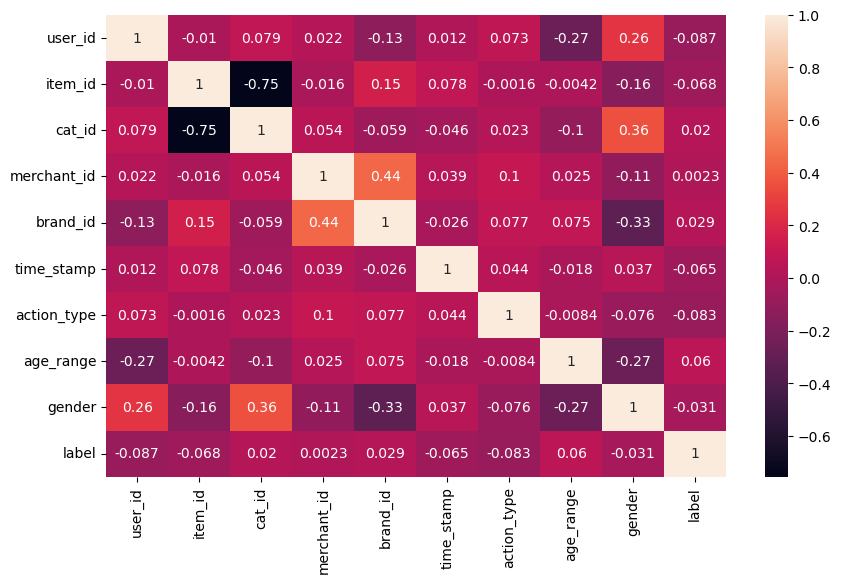

In [218]:
cor=final_merged_training_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [221]:
#!pip install mlxtend

<b>Exhaustive Feature Selection</b>

This is the most robust feature selection method covered so far. This is a brute-force evaluation of each feature subset. This means it tries every possible combination of the variables and returns the best-performing subset.

In [233]:
from mlxtend.feature_selection import *
from sklearn.ensemble import RandomForestClassifier
# create the ExhaustiveFeatureSelector object.
efs = ExhaustiveFeatureSelector (RandomForestClassifier (),min_features=4,max_features=8,scoring='roc_auc',cv=2)

In [234]:
efs = efs.fit (X, Y)

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_va

/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ankitraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
Features: 381/381

In [236]:
#print selected features
selected_features = final_merged_training_df.columns[list(efs.best_idx_)]
print(selected_features)

Index(['item_id', 'cat_id', 'brand_id', 'action_type'], dtype='object')


In [237]:
# print the final prediction score.
print(efs.best_score_)

0.5561829474872954


<b>Random Forest Importance</b>

Random Forests is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [240]:
from sklearn.ensemble import RandomForestClassifier
#create the random forest with your hyperparameters.
model = RandomForestClassifier (n_estimators=140)
# fit the model to start training.
model.fit(X, Y)

/var/folders/80/gsqyjx5d1g3bsm_6v0mc49gm0000gn/T/ipykernel_82089/2636370546.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X, Y)


RandomForestClassifier(n_estimators=140)

<AxesSubplot:>

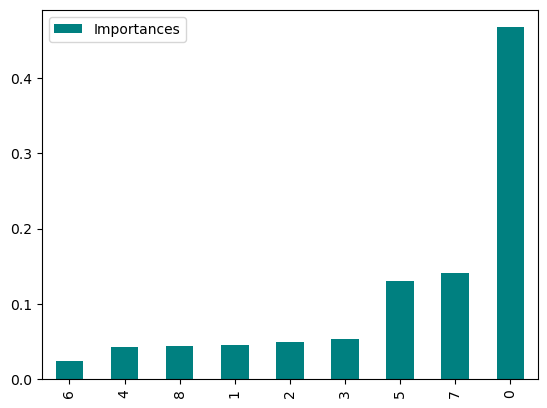

In [246]:
#get the importance of the resulting features.
importances = model. feature_importances_
# create a data frame for visualization
final_df = pd.DataFrame({"Features": X.columns, "Importances" : importances})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')
# plot the feature importances in bars.
final_df.plot.bar(color = 'teal')

# PCA (Principal Component Analysis)

PCA is a dimensionality reduction approach that converts a dataset’s columns into a new group of characteristics called Principal Components (PCs). The variance in a column is the information contained in it. The main aim of Principal Components is to express data in the smallest number of columns possible.

PCA is a process for reducing the complexity of high-dimensional data while preserving trends and patterns. It accomplishes this by condensing the data into fewer components, which can be assumed as feature summaries.

Components are unrelated features that are composites of the original features. They are also assigned so that the first has the most variance in the data, the second for the second most variance, and so on.

PCA is highly beneficial when working with large data sets with many characteristics. Image processing and genomic research are two examples of typical applications that deal with hundreds, if not tens of thousands, of columns.